Partial depdendence plots

In [ ]:
from sklearn.inspection import PartialDependenceDisplay


In [ ]:
# features_to_plot = ['Fastbreak', 'Distance','TOT_2P%', 'TOT_Shot_type_made']
features_to_plot = ['Fastbreak', 'Distance']

InvalidParameterError: The 'estimator' parameter of partial_dependence must be an object implementing 'fit' and 'predict', an object implementing 'fit' and 'predict_proba' or an object implementing 'fit' and 'decision_function'. Got <lightgbm.basic.Booster object at 0x0000019D31276190> instead.

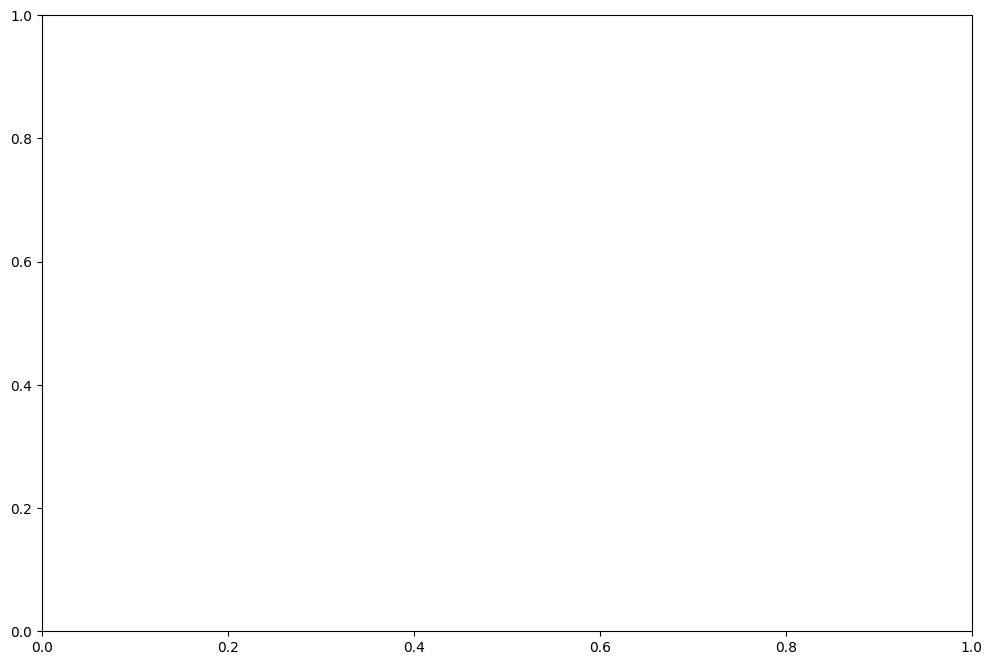

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(bst, X_train, features_to_plot, ax=ax)
plt.show()

In [ ]:
# !pip install pdpbox

In [ ]:
from pdpbox import pdp, info_plots

In [ ]:
import pdpbox.pdp
print(dir(pdpbox.pdp))

['FeatureInfo', 'PDPInteract', 'PDPInteractPlotEngine', 'PDPIsolate', 'PDPIsolatePlotEngine', 'PDPResult', '_PDPBase', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_calc_n_jobs', '_calc_preds', '_check_classes', '_check_cluster_params', '_check_dataset', '_check_frac_to_plot', '_check_model', '_check_pdp_interact_plot_type', '_check_plot_engine', '_expand_params_for_interact', '_make_list', 'np', 'pd', 'pqdm', 'tqdm', 'warnings']


In [ ]:
for feature in ['Fastbreak', 'Distance']:
    pdp_isolated = pdp.PDPIsolate(
        model=bst, 
        df=X_train, 
        model_features=X_train.columns.tolist(), 
        feature=feature,
        feature_name=feature,
        n_classes = 2
    )
    pdp.pdp_plot(pdp_isolated, feature)
    plt.show()


obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

[LightGBM] [Info] Number of positive: 175383, number of negative: 173679
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2761
[LightGBM] [Info] Number of data points in the train set: 349062, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502441 -> initscore=0.009763
[LightGBM] [Info] Start training from score 0.009763


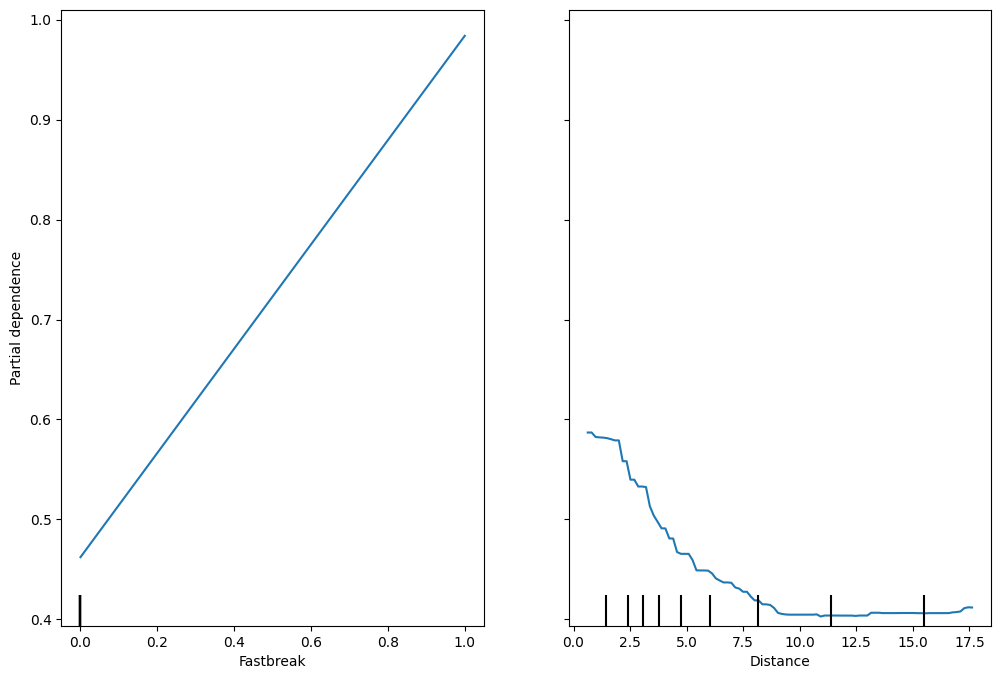

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

lgbm_model.fit(X_train, y_train)
features_to_plot = ['Fastbreak', 'Distance']

fig, ax = plt.subplots(figsize=(12, 8))
# PartialDependenceDisplay.from_estimator(lgbm_model, X_train, features_to_plot, ax=ax)
PartialDependenceDisplay.from_estimator(lgbm_model, X_train, features_to_plot, ax=ax)
plt.show()


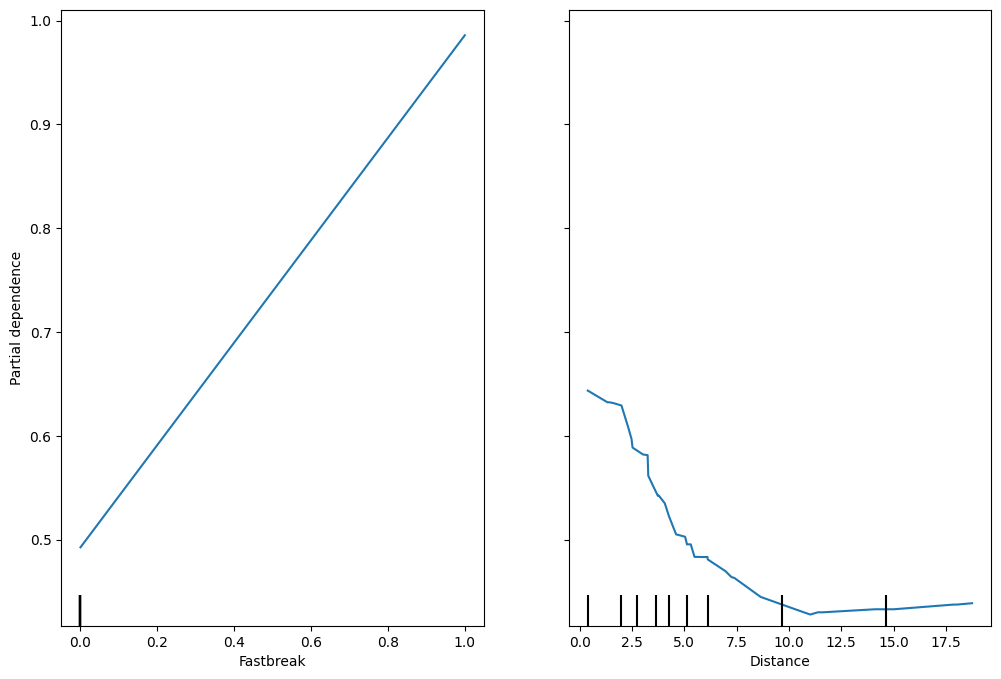

In [ ]:
features_to_plot = ['Fastbreak', 'Distance']
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(lgbm_model, X_train[:50], features_to_plot, ax=ax)
plt.show()

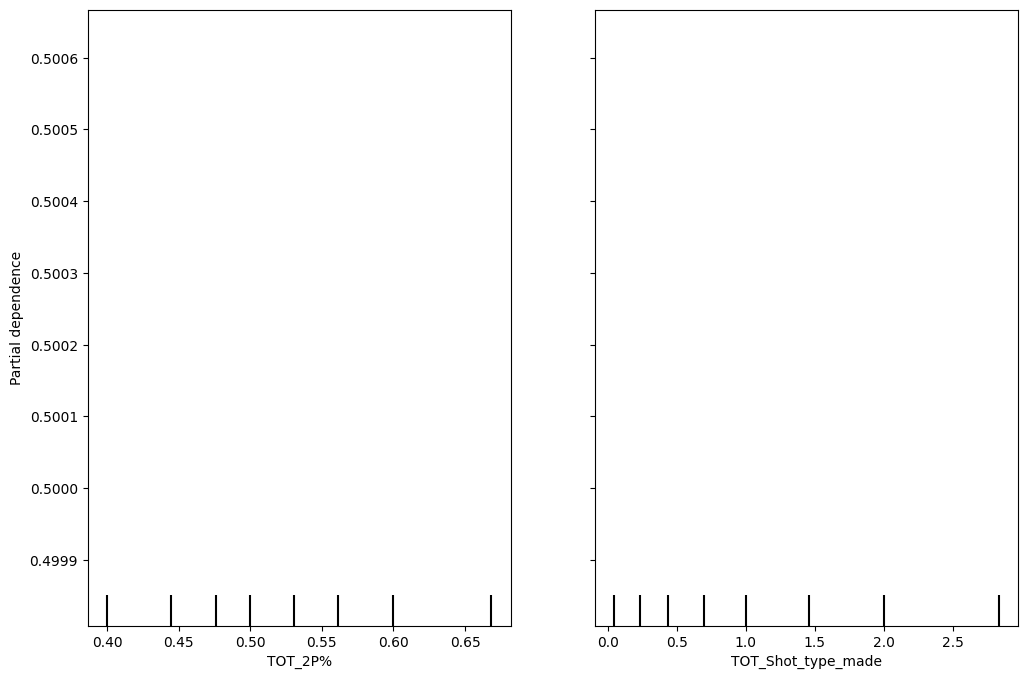

In [ ]:
features_to_plot = ['TOT_2P%', 'TOT_Shot_type_made']

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(lgbm_model, X_train, features_to_plot, ax=ax)
plt.show()

Rule-fit

In [ ]:
# !pip install git+https://github.com/christophM/rulefit.git

In [ ]:
features = X_train.columns
print(features)

Index(['Fastbreak', 'Distance', 'Dunk', 'Jumpshot', 'Red_Zone', 'Off_Steal',
       'height', 'Drive', 'opp_team_wl_ratio_prev_season',
       'Last_season_Shot_type_perc%', 'TOT_Zone_made', 'TOT_Shot_type_perc%',
       'Layup', 'TOT_2P%', 'Last_season_Shot_type_attempted', 'score_pre_shot',
       'Angle', 'x_coordinate', 'Big', 'TOT_Shot_type_made', 'Time_Seconds',
       'Shot_type', 'Zone', 'Location'],
      dtype='object')


In [ ]:
from rulefit import RuleFit

rf = RuleFit(bst)
rf.fit(X, y, feature_names=features)

TypeError: unsupported operand type(s) for /: 'int' and 'Booster'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
# Create a LightGBM dataset and specify the categorical features
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set up LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100
bst_2 = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst_2.predict(X_test, num_iteration=bst.best_iteration)

[LightGBM] [Info] Number of positive: 175383, number of negative: 173679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 349062, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502441 -> initscore=0.009763
[LightGBM] [Info] Start training from score 0.009763


In [ ]:
features = X_train.columns
print(features)
rf = RuleFit(bst_2)
rf.fit(X_train, y_train, feature_names=features)

Index(['Fastbreak', 'Distance', 'Dunk', 'Jumpshot', 'Red_Zone', 'Off_Steal',
       'height', 'Drive', 'opp_team_wl_ratio_prev_season',
       'Last_season_Shot_type_perc%', 'TOT_Zone_made', 'TOT_Shot_type_perc%',
       'Layup', 'TOT_2P%', 'Last_season_Shot_type_attempted', 'score_pre_shot',
       'Angle', 'x_coordinate', 'Big', 'TOT_Shot_type_made', 'Time_Seconds'],
      dtype='object')


TypeError: unsupported operand type(s) for /: 'int' and 'Booster'

In [ ]:
# features = X_train.columns

features = ['Fastbreak', 'Distance', 'Dunk', 'Jumpshot', 'Red_Zone', 'Off_Steal', 'Drive', 
       'Angle', 'x_coordinate', 'Big', 'Time_Seconds']

rf = RuleFit()
rf.fit(X_train[features], y_train, feature_names=features)

InvalidIndexError: (slice(None, None, None), 0)